In [1]:
import pandas as pd

In [2]:
grab_reviews = pd.read_csv("GRAB_REVIEWS_CLEANED 5.csv")
grab_reviews

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,language,translated_review,translated_review_cleaned,translated_review_stopremoved,translated_review_cleaned_sentiment
0,0,0,0,0,Great app!,5,NaN,A Google user,NaN,2013-05-31T16:03:05.000Z,1,en,Great app!,great app,great,POSITIVE
1,1,1,1,1,Super like,5,115115*********328635,A Google user,v2.0,2013-06-09T03:37:35.000Z,1,no,Super like,super like,super like,POSITIVE
2,2,2,2,2,This app makes it easy to find a cab. Drivers ...,5,106986*********228101,A Google user,v2.0,2013-06-12T11:58:10.000Z,2,en,This app makes it easy to find a cab. Drivers ...,this app makes it easy to find a cab drivers a...,makes easy find cab drivers respectful even em...,POSITIVE
3,3,3,3,3,Great experience!,5,101636*********375392,A Google user,v2.0,2013-06-16T17:55:07.000Z,1,ro,Great experience!,great experience,great experience,POSITIVE
4,4,4,4,4,Very convenient. Cool.,5,115165*********970835,A Google user,v2.0,2013-06-26T23:24:03.000Z,1,en,Very convenient. Cool.,very convenient cool,convenient cool,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406174,406267,406267,406267,441615,THE APPS IS NOT OKAY FOR ME.,1,106490*********569396,A Google user,5.277.0,2023-11-03T08:43:50.000Z,3,en,THE APPS IS NOT OKAY FOR ME.,the apps is not okay for me,okay,NEGATIVE
406175,406268,406268,406268,441616,Boycott since the owner support genocide. Disa...,1,109732*********787269,A Google user,5.277.0,2023-11-04T11:45:46.000Z,170,en,Boycott since the owner support genocide. Disa...,boycott since the owner support genocide disap...,boycott since owner support genocide disappoin...,NEGATIVE
406176,406269,406269,406269,441617,Is real hell,1,113135*********022485,A Google user,5.277.0,2023-11-04T11:47:25.000Z,128,en,Is real hell,is real hell,real hell,NEGATIVE
406177,406270,406270,406270,441618,good,5,102182*********591401,A Google user,5.278.0,2023-11-07T14:21:44.000Z,1,so,good,good,good,POSITIVE


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(grab_reviews['translated_review_stopremoved'])

TfidfVectorizer()

In [4]:
X = tfidf.transform(grab_reviews['translated_review_stopremoved'])
grab_reviews['translated_review_stopremoved'][1]

'super like'

In [5]:
import numpy as np
grab_reviews.dropna(inplace=True)
grab_reviews[grab_reviews['review_rating'] != 3]
grab_reviews['Positivity'] = np.where(grab_reviews['review_rating'] > 3, 1, 0)
grab_reviews.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,language,translated_review,translated_review_cleaned,translated_review_stopremoved,translated_review_cleaned_sentiment,Positivity
1,1,1,1,1,Super like,5,115115*********328635,A Google user,v2.0,2013-06-09T03:37:35.000Z,1,no,Super like,super like,super like,POSITIVE,1
2,2,2,2,2,This app makes it easy to find a cab. Drivers ...,5,106986*********228101,A Google user,v2.0,2013-06-12T11:58:10.000Z,2,en,This app makes it easy to find a cab. Drivers ...,this app makes it easy to find a cab drivers a...,makes easy find cab drivers respectful even em...,POSITIVE,1
3,3,3,3,3,Great experience!,5,101636*********375392,A Google user,v2.0,2013-06-16T17:55:07.000Z,1,ro,Great experience!,great experience,great experience,POSITIVE,1
4,4,4,4,4,Very convenient. Cool.,5,115165*********970835,A Google user,v2.0,2013-06-26T23:24:03.000Z,1,en,Very convenient. Cool.,very convenient cool,convenient cool,POSITIVE,1
7,7,7,7,8,Resolves a lot of worries especially on crunch...,5,100317*********339005,A Google user,v2.0,2013-07-04T04:43:51.000Z,1,en,Resolves a lot of worries especially on crunch...,resolves a lot of worries especially on crunch...,resolves lot worries especially crunch times,NEGATIVE,1


In [6]:
grab_reviews

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes,language,translated_review,translated_review_cleaned,translated_review_stopremoved,translated_review_cleaned_sentiment,Positivity
1,1,1,1,1,Super like,5,115115*********328635,A Google user,v2.0,2013-06-09T03:37:35.000Z,1,no,Super like,super like,super like,POSITIVE,1
2,2,2,2,2,This app makes it easy to find a cab. Drivers ...,5,106986*********228101,A Google user,v2.0,2013-06-12T11:58:10.000Z,2,en,This app makes it easy to find a cab. Drivers ...,this app makes it easy to find a cab drivers a...,makes easy find cab drivers respectful even em...,POSITIVE,1
3,3,3,3,3,Great experience!,5,101636*********375392,A Google user,v2.0,2013-06-16T17:55:07.000Z,1,ro,Great experience!,great experience,great experience,POSITIVE,1
4,4,4,4,4,Very convenient. Cool.,5,115165*********970835,A Google user,v2.0,2013-06-26T23:24:03.000Z,1,en,Very convenient. Cool.,very convenient cool,convenient cool,POSITIVE,1
7,7,7,7,8,Resolves a lot of worries especially on crunch...,5,100317*********339005,A Google user,v2.0,2013-07-04T04:43:51.000Z,1,en,Resolves a lot of worries especially on crunch...,resolves a lot of worries especially on crunch...,resolves lot worries especially crunch times,NEGATIVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406174,406267,406267,406267,441615,THE APPS IS NOT OKAY FOR ME.,1,106490*********569396,A Google user,5.277.0,2023-11-03T08:43:50.000Z,3,en,THE APPS IS NOT OKAY FOR ME.,the apps is not okay for me,okay,NEGATIVE,0
406175,406268,406268,406268,441616,Boycott since the owner support genocide. Disa...,1,109732*********787269,A Google user,5.277.0,2023-11-04T11:45:46.000Z,170,en,Boycott since the owner support genocide. Disa...,boycott since the owner support genocide disap...,boycott since owner support genocide disappoin...,NEGATIVE,0
406176,406269,406269,406269,441617,Is real hell,1,113135*********022485,A Google user,5.277.0,2023-11-04T11:47:25.000Z,128,en,Is real hell,is real hell,real hell,NEGATIVE,0
406177,406270,406270,406270,441618,good,5,102182*********591401,A Google user,5.278.0,2023-11-07T14:21:44.000Z,1,so,good,good,good,POSITIVE,1


In [7]:
from sklearn.model_selection import train_test_split
X = grab_reviews.review_text
y = grab_reviews.Positivity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 257236 entries with 24.81% negative, 75.19% positive


In [8]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 85746 entries with 24.91% negative, 75.09% positive


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [10]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(class_weight='balanced')


Test result for 10000 features
accuracy score: 91.06%
Test result for 20000 features
accuracy score: 91.18%
Test result for 30000 features
accuracy score: 91.03%


In [12]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=20000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.80      0.87      0.83     21362
    positive       0.95      0.93      0.94     64384

    accuracy                           0.91     85746
   macro avg       0.88      0.90      0.89     85746
weighted avg       0.92      0.91      0.91     85746



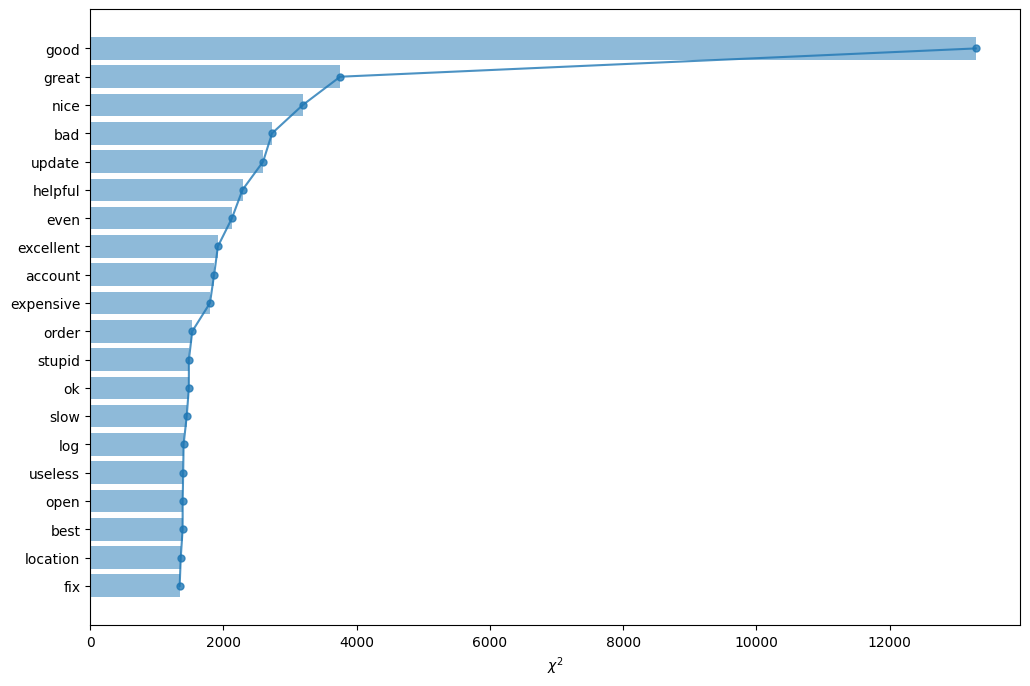

In [13]:
from sklearn.feature_selection import chi2
tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(grab_reviews['translated_review_stopremoved'])
y = grab_reviews.Positivity
chi2score = chi2(X_tfidf, y)[0]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names_out(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();